In [1]:
import os
import json
import pickle
from itertools import product

from tqdm import tqdm
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def sliding_min(arr, window):
    result = np.full(len(arr), np.nan, dtype=float)
    result[0:window-1] = arr[0:window-1]
    for i in range(window - 1, len(arr)):
        result[i] = np.min(arr[i - window + 1 : i + 1])
    return result

In [3]:
# identify which experiments are present/missing
for seed in range(40):
    if not os.path.exists(f"/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth3-width128-seed{seed}/results.pkl"):
        print(f"curriculum-depth3-width128-seed{seed} missing")

for seed in range(40):
    if not os.path.exists(f"/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth2-width128-seed{seed}/results.pkl"):
        print(f"curriculum-depth2-width128-seed{seed} missing")

for seed in range(40):
    if not os.path.exists(f"/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth2-width361-seed{seed}/results.pkl"):
        print(f"curriculum-depth2-width361-seed{seed} missing")

for seed in range(40):
    if not os.path.exists(f"/om2/user/ericjm/narrow/experiments/compositions4/results/onlycomposite-depth3-width128-seed{seed}/results.pkl"):
        print(f"onlycomposite-depth3-width128-seed{seed} missing")


In [5]:
SKIP = 50

In [15]:
# let's load up the skilldepth2 results with network depth 3
with open("/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth3-width128-seed2/results.pkl", "rb") as f:
    results = pickle.load(f)

results['subtask_losses_bits_sliding_min'] = dict()
for i, code in enumerate(tqdm(results['codes'])):
    results['subtask_losses_bits_sliding_min'][i] = sliding_min(results['subtask_losses'][i], 100) * np.log2(np.e)
    results['subtask_losses_bits_sliding_min'][i] = results['subtask_losses_bits_sliding_min'][i][::SKIP]
cum_samples = np.cumsum(results['samples'])[::SKIP]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:11<00:00,  2.28s/it]


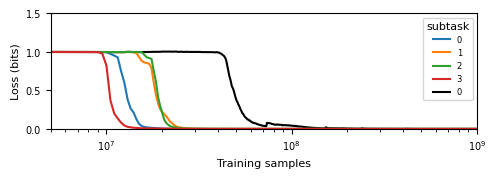

In [7]:
plt.figure(figsize=(5.5, 1.5))
# plot these results
plt.plot(cum_samples, results['subtask_losses_bits_sliding_min'][0], label=results['codes'][0], color='C0', alpha=1)
plt.plot(cum_samples, results['subtask_losses_bits_sliding_min'][1], label=results['codes'][1], color='C1', alpha=1)
plt.plot(cum_samples, results['subtask_losses_bits_sliding_min'][2], label=results['codes'][2], color='C2', alpha=1)
plt.plot(cum_samples, results['subtask_losses_bits_sliding_min'][3], label=results['codes'][3], color='C3', alpha=1)
plt.plot(cum_samples, results['subtask_losses_bits_sliding_min'][4], label=results['codes'][0], color='black', alpha=1, zorder=-10)

# for i, code in enumerate(results['codes']):
#     if len(code) == 1:
#         color = f'C{i}'
#     else:
#         color = 'black'
#     plt.plot(cum_samples, results['subtask_losses_bits_sliding_min'][i], label=f"{code}", color=color, alpha=1)

plt.legend(title='subtask', title_fontsize=8, prop={'size': 6})
plt.xscale('log')
plt.xlim(5e6, 1e9)
plt.ylim(0, 1.5)
plt.ylabel("Loss (bits)", fontsize=8)
plt.xlabel("Training samples", fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.tick_params(axis='both', which='minor', labelsize=7)

In [8]:
len(results['subtask_losses_bits_sliding_min'][0])

4000

In [9]:
# Store results in dictionaries
curriculum_results = {}
nocurriculum_results = {}

for seed in tqdm(range(40)):
    try:
        with open(f"/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth3-width128-seed{seed}/results.pkl", "rb") as f:
            curriculum_results[seed] = pickle.load(f)
        curriculum_results[seed]['losses_bits'] = sliding_min(curriculum_results[seed]['subtask_losses'][4], 100) * np.log2(np.e)
        curriculum_results[seed]['losses_bits'] = curriculum_results[seed]['losses_bits'][::SKIP]
        curriculum_results[seed]['cum_samples'] = np.cumsum(curriculum_results[seed]['samples'])[::SKIP]
    except Exception as e:
        print(f"Error loading results for seed {seed}: {e}")

for seed in tqdm(range(40)):
    try:
        with open(f"/om2/user/ericjm/narrow/experiments/compositions4/results/onlycomposite-depth3-width128-seed{seed}/results.pkl", "rb") as f:
            nocurriculum_results[seed] = pickle.load(f)
        nocurriculum_results[seed]['losses_bits'] = sliding_min(nocurriculum_results[seed]['subtask_losses'][0], 100) * np.log2(np.e)
        nocurriculum_results[seed]['losses_bits'] = nocurriculum_results[seed]['losses_bits'][::SKIP]
        nocurriculum_results[seed]['cum_samples'] = np.cumsum(nocurriculum_results[seed]['samples'])[::SKIP]
    except Exception as e:
        print(f"Error loading results for seed {seed}: {e}")

100%|██████████| 40/40 [07:35<00:00, 11.38s/it]


In [11]:
# load up all depth=3 results and depth=2 results for curriculum-skilldepth2
depth2_results = {}
depth3_results = {}

for seed in tqdm(range(40)):
    try:
        with open(f"/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth3-width128-seed{seed}/results.pkl", "rb") as f:
            depth3_results[seed] = pickle.load(f)
        depth3_results[seed]['losses_bits'] = sliding_min(depth3_results[seed]['subtask_losses'][4], 100) * np.log2(np.e)
        depth3_results[seed]['losses_bits'] = depth3_results[seed]['losses_bits'][::SKIP]
        depth3_results[seed]['cum_samples'] = np.cumsum(depth3_results[seed]['samples'])[::SKIP]
    except Exception as e:
        print(f"Error loading results for seed {seed}: {e}")
    
for seed in tqdm(range(40)):
    try:
        with open(f"/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth2-width128-seed{seed}/results.pkl", "rb") as f:
            depth2_results[seed] = pickle.load(f)
        depth2_results[seed]['losses_bits'] = sliding_min(depth2_results[seed]['subtask_losses'][4], 100) * np.log2(np.e)
        depth2_results[seed]['losses_bits'] = depth2_results[seed]['losses_bits'][::SKIP]
        depth2_results[seed]['cum_samples'] = np.cumsum(depth2_results[seed]['samples'])[::SKIP]
    except Exception as e:
        print(f"Error loading results for seed {seed}: {e}")

100%|██████████| 40/40 [01:24<00:00,  2.11s/it]


In [12]:
results['codes']

[[0], [1], [2], [3], [0, 1, 2, 3]]

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:00<00:00, 614.64it/s]


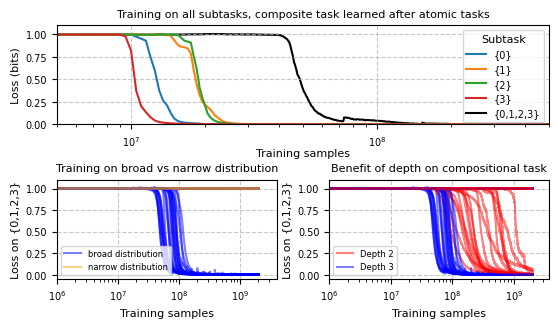

In [25]:
fig = plt.figure(figsize=(5.5, 3.2))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])

ax1.plot(cum_samples, results['subtask_losses_bits_sliding_min'][0], label=str(set(results['codes'][0])), color='C0', alpha=1)
ax1.plot(cum_samples, results['subtask_losses_bits_sliding_min'][1], label=str(set(results['codes'][1])), color='C1', alpha=1)
ax1.plot(cum_samples, results['subtask_losses_bits_sliding_min'][2], label=str(set(results['codes'][2])), color='C2', alpha=1)
ax1.plot(cum_samples, results['subtask_losses_bits_sliding_min'][3], label=str(set(results['codes'][3])), color='C3', alpha=1)

ax1.plot(cum_samples, results['subtask_losses_bits_sliding_min'][4], label=str(set(results['codes'][4])).replace(" ", ""), color='black', alpha=1, zorder=-10)

# for i, code in enumerate(results['codes']):
#     if len(code) == 1:
#         color = f'C{i}'
#     else:
#         color = 'black'
#     ax1.plot(cum_samples, results['subtask_losses_bits_sliding_min'][i], label=f"{code}", color=color, alpha=1)

ax1.legend(title='Subtask', title_fontsize=8, prop={'size': 7})
ax1.set_xscale('log')
ax1.set_xlim(5e6, 5e8)
ax1.set_ylim(0, 1.1)
ax1.set_ylabel("Loss (bits)", fontsize=8)
ax1.set_xlabel("Training samples", fontsize=8, labelpad=0)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.tick_params(axis='both', which='minor', labelsize=7)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_title("Training on all subtasks, composite task learned after atomic tasks", fontsize=8)


# Bottom left subplot, compositional loss w/ vs w/o curriculum
ax2 = fig.add_subplot(gs[1, 0])
for seed in tqdm(curriculum_results):
    ax2.plot(curriculum_results[seed]['cum_samples'], curriculum_results[seed]['losses_bits'], label=f"broad distribution" if seed == 0 else None, color='blue', alpha=0.5)
    ax2.plot(nocurriculum_results[seed]['cum_samples'], nocurriculum_results[seed]['losses_bits'], label=f"narrow distribution" if seed == 0 else None, color='orange', alpha=0.5)

ax2.set_ylim(-0.05, 1.1)
# ax2.set_xlim(5e6, 3e8)
ax2.set_xscale('log')
ax2.set_xlim(1e6, None)
ax2.set_ylabel("Loss on {0,1,2,3}", fontsize=8)
ax2.set_xlabel("Training samples", fontsize=8)
ax2.legend(prop={'size': 6}, loc='lower left')
ax2.set_title("Training on broad vs narrow distribution", fontsize=8)
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.tick_params(axis='both', which='minor', labelsize=7)
ax2.grid(True, linestyle='--', alpha=0.7)
# ax2.text(0.5, 0.5, 'Subplot 2', ha='center', va='center')
# ax2.set_title("Bottom Left", fontsize=8)

# Bottom right subplot
ax3 = fig.add_subplot(gs[1, 1])
# ax3.text(0.5, 0.5, 'Subplot 3', ha='center', va='center')
for seed in tqdm(depth3_results):
    ax3.plot(depth3_results[seed]['cum_samples'], depth3_results[seed]['losses_bits'], label=f"Depth 3" if seed == 2 else None, color='blue', alpha=0.5)
    ax3.plot(depth2_results[seed]['cum_samples'], depth2_results[seed]['losses_bits'], label=f"Depth 2" if seed == 0 else None, color='red', alpha=0.5)

ax3.set_ylim(-0.05, 1.1)
ax3.set_xscale('log')
ax3.set_xlim(1e6, None)
ax3.set_xlabel("Training samples", fontsize=8)
ax3.set_ylabel("Loss on {0,1,2,3}", fontsize=8)
ax3.legend(prop={'size': 6}, loc='lower left')
ax3.set_title("Benefit of depth on compositional task", fontsize=8)
ax3.tick_params(axis='both', which='major', labelsize=7)
ax3.tick_params(axis='both', which='minor', labelsize=7)
ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=0.4)
plt.savefig("figures/compositional-parity.pdf")
# plt.savefig("figures/compositional-parity.png", dpi=300)


In [20]:
# count how many seeds converged
converged_curriculum = 0
converged_nocurriculum = 0
for seed in range(40):
    if curriculum_results[seed]['losses_bits'][-1] < 0.1:
        converged_curriculum += 1
    if nocurriculum_results[seed]['losses_bits'][-1] < 0.1:
        converged_nocurriculum += 1

print(f"Curriculum: {converged_curriculum} seeds converged")
print(f"Nocurriculum: {converged_nocurriculum} seeds converged")

Curriculum: 27 seeds converged
Nocurriculum: 0 seeds converged


In [11]:
depth3_results[0]['n_parameters'], depth2_results[0]['n_parameters']

(25602, 9090)

In [26]:
# load up all depth=3 results and depth=2 results for curriculum-skilldepth2
depth2_wide_results = {}
for seed in tqdm(range(40)):
    try:
        with open(f"/om2/user/ericjm/narrow/experiments/compositions4/results/curriculum-depth2-width361-seed{seed}/results.pkl", "rb") as f:
            depth2_wide_results[seed] = pickle.load(f)
        depth2_wide_results[seed]['losses_bits'] = sliding_min(depth2_wide_results[seed]['subtask_losses'][4], 100) * np.log2(np.e)
        depth2_wide_results[seed]['losses_bits'] = depth2_wide_results[seed]['losses_bits'][::SKIP]
        depth2_wide_results[seed]['cum_samples'] = np.cumsum(depth2_wide_results[seed]['samples'])[::SKIP]
    except Exception as e:
        print(f"Error loading results for seed {seed}: {e}")

100%|██████████| 40/40 [01:24<00:00,  2.12s/it]


In [27]:
depth2_wide_results[0]['n_parameters']

25633

In [29]:
# count how many seeds converged on depth2 vs depth3
converged_depth2 = 0
converged_depth3 = 0
converged_depth2_wide = 0
for seed in range(40):
    if depth2_results[seed]['losses_bits'][-1] < 0.1:
        converged_depth2 += 1
    if depth3_results[seed]['losses_bits'][-1] < 0.1:
        converged_depth3 += 1
    if depth2_wide_results[seed]['losses_bits'][-1] < 0.1:
        converged_depth2_wide += 1

print(f"Depth 2: {converged_depth2} seeds converged")
print(f"Depth 3: {converged_depth3} seeds converged")
print(f"Depth 2 wide: {converged_depth2_wide} seeds converged")

Depth 2: 19 seeds converged
Depth 3: 27 seeds converged
Depth 2 wide: 16 seeds converged


100%|██████████| 40/40 [00:00<00:00, 454.76it/s]


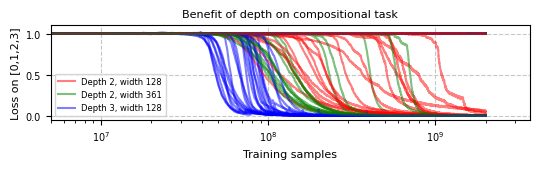

In [30]:
fig = plt.figure(figsize=(5.5, 1.8))
ax = fig.add_subplot(111)

for seed in tqdm(depth3_results):
    ax.plot(depth3_results[seed]['cum_samples'], depth3_results[seed]['losses_bits'], label=f"Depth 3, width 128" if seed == 2 else None, color='blue', alpha=0.5)
    ax.plot(depth2_results[seed]['cum_samples'], depth2_results[seed]['losses_bits'], label=f"Depth 2, width 128" if seed == 0 else None, color='red', alpha=0.5)
    ax.plot(depth2_wide_results[seed]['cum_samples'], depth2_wide_results[seed]['losses_bits'], label=f"Depth 2, width 361" if seed == 0 else None, color='green', alpha=0.5)

ax.set_ylim(-0.05, 1.1)
ax.set_xscale('log')
ax.set_xlim(5e6, None)
ax.set_xlabel("Training samples", fontsize=8)
ax.set_ylabel("Loss on [0,1,2,3]", fontsize=8)
ax.legend(prop={'size': 6}, loc='lower left')
ax.set_title("Benefit of depth on compositional task", fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.savefig("figures/compositional-parity-depth-comparisons.pdf")
plt.savefig("figures/compositional-parity-depth-comparisons.png", dpi=300)

Ideal experimental setup:
- Baseline run(s):
    - Train on [0],[1],[2],[3],[0,1,2,3] YES
    - Depth 3 YES
    - Width 128 YES
    - 2000 sampes per task per batch YES
- Only composite runs:
    - Train on [0,1,2,3] YES
    - Depth 3
    - Width 128
    - 2000 samples per batch
- Depth 2 runs:
    - Train on [0],[1],[2],[3],[0,1,2,3]
    - Depth 2
    - Width 128
    - 2000 samples per task per batch
- Depth 2 wide runs:
    - Train on [0],[1],[2],[3],[0,1,2,3]
    - Depth 3
    - Width 

In [1]:
n = 64
m = 4
w = 128
n_params_depth3 = (m + n) * w + w + (w * w) + w + (w * 2) + 2
n_params_depth2 = (m + n) * w + w + (w * 2) + 2
n_params_depth3, n_params_depth2

(25602, 9090)

In [9]:
w2 = 361
(m + n) * w2 + w2 + (w2 * 2) + 2

25633